In [1]:
import pandas as pd

file_path = 'archive/rideshare_kaggle.csv'
rideshare_data = pd.read_csv(file_path)


In [ ]:
# Display the first five rows
print(rideshare_data.head())

# Get a concise summary of the DataFrame
print("info")
print(rideshare_data.info())

# Get descriptive statistics for numerical columns
print("describe")
print(rideshare_data.describe())


In [ ]:
# Check for missing values
print(rideshare_data.isnull().sum())

# Example: Drop rows with missing values
rideshare_data = rideshare_data.dropna()

print("After dropping rows with missing values")
print(rideshare_data.isnull().sum())


In [ ]:
# Convert 'timestamp' column to datetime
rideshare_data['timestamp'] = pd.to_datetime(rideshare_data['timestamp'])


# Extract hour from 'timestamp'
rideshare_data['hour'] = rideshare_data['timestamp'].dt.hour

# Save to a new CSV file
rideshare_data.to_csv('archive/rideshare_data_cleaned.csv', index=False)


AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
pip install umap-learn


  Obtaining dependency information for umap-learn from https://files.pythonhosted.org/packages/3c/8f/671c0e1f2572ba625cbcc1faeba9435e00330c3d6962858711445cf1e817/umap_learn-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/d2/53/d23a97e0a2c690d40b165d1062e2c4ccc796be458a1ce59f6ba030434663/pynndescent-0.5.13-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
   --------------------------- ------------ 61.4/88.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 88.8/88.8 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


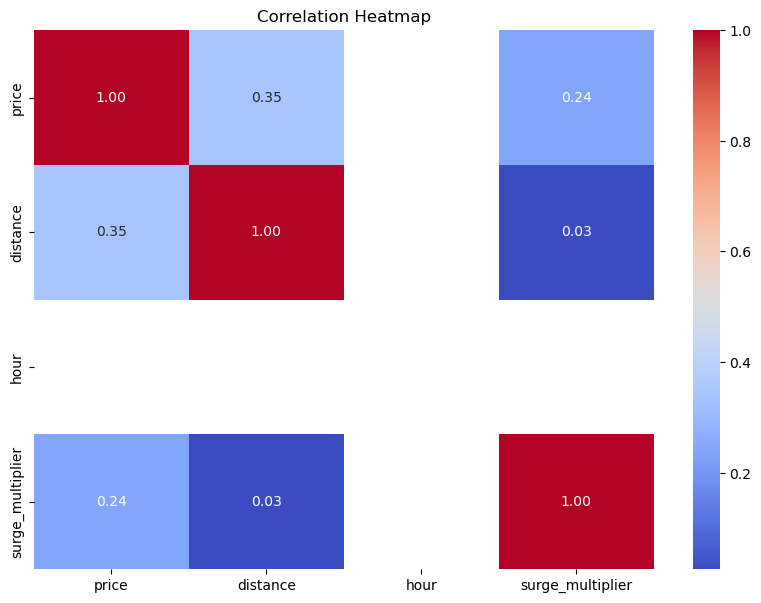

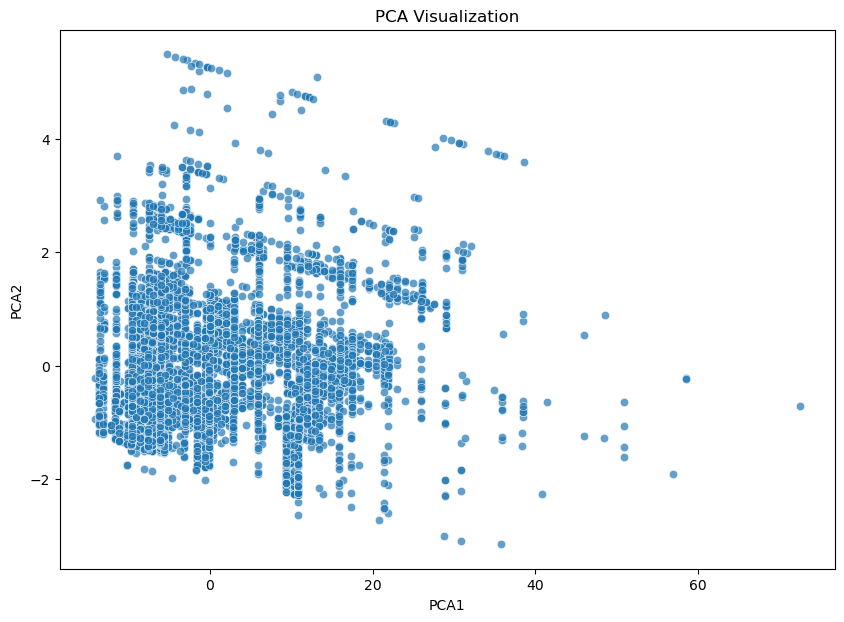

c:\Users\prati\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


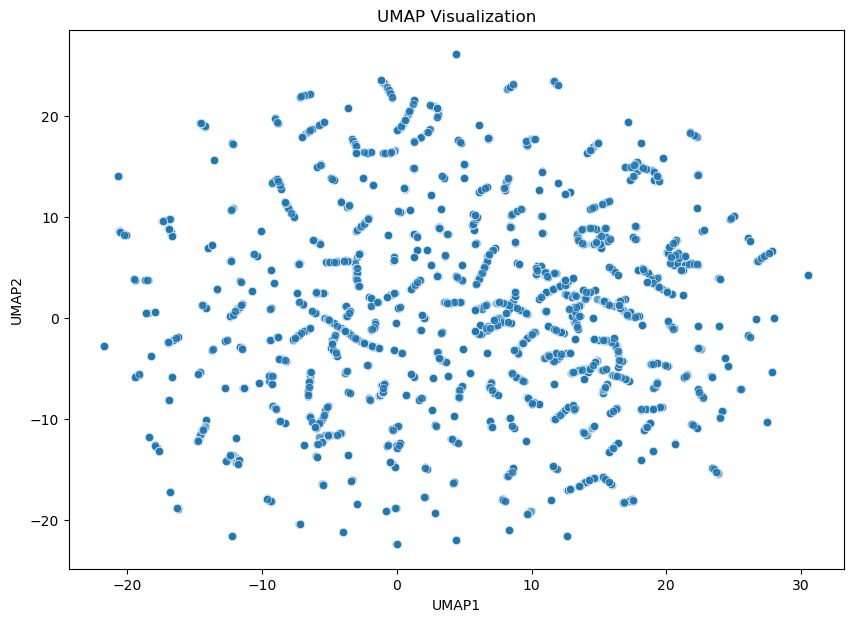

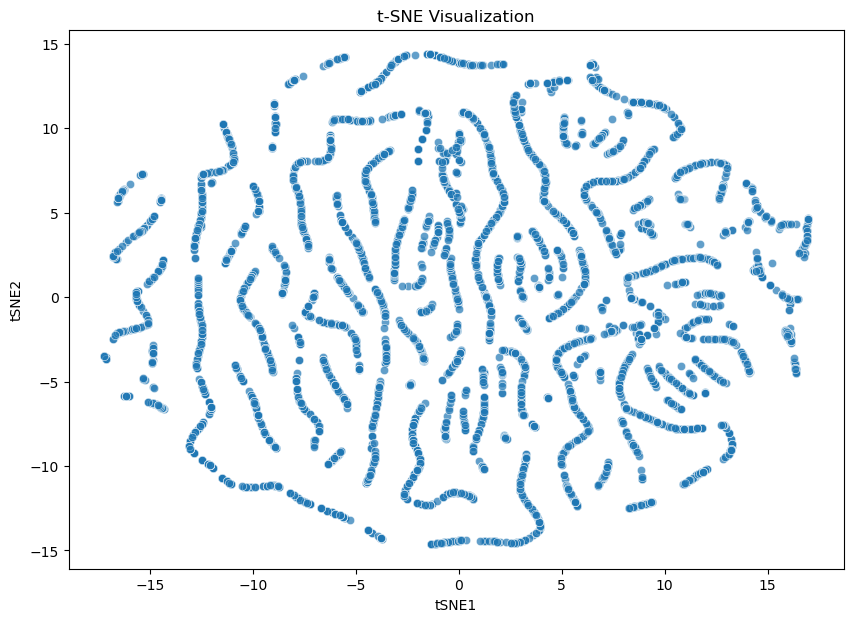

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
file_path = 'archive/rideshare_data_cleaned.csv'  # Adjust the path if needed
rideshare_data = pd.read_csv(file_path)

# Step 1: Select Relevant Columns for Analysis
selected_columns = ['price', 'distance', 'hour', 'surge_multiplier']
numerical_data = rideshare_data[selected_columns].dropna()

# Step 2: Correlation Heatmap
plt.figure(figsize=(10, 7))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Reduce Data Size (sample 10,000 rows for faster computation)
if len(numerical_data) > 10000:
    sampled_data = numerical_data.sample(10000, random_state=42).reset_index(drop=True)
else:
    sampled_data = numerical_data.reset_index(drop=True)

# Step 4: PCA Visualization
pca = PCA(n_components=2)  # Reduce to 2 components
pca_result = pca.fit_transform(sampled_data)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, alpha=0.7)
plt.title("PCA Visualization")
plt.show()

# Step 5: UMAP Visualization (Optional)
try:
    import umap
    reducer = umap.UMAP(random_state=42)
    umap_result = reducer.fit_transform(sampled_data)
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, alpha=0.7)
    plt.title("UMAP Visualization")
    plt.show()
except ImportError:
    print("UMAP is not installed. Install it using 'pip install umap-learn'.")

# Step 6: t-SNE Visualization
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    n_iter=300,  # Fewer iterations for speed
    method='barnes_hut',  # Faster t-SNE approximation
    learning_rate=200,
)
tsne_result = tsne.fit_transform(pca_result)  # Use PCA result for t-SNE
tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df, alpha=0.7)
plt.title("t-SNE Visualization")
plt.show()


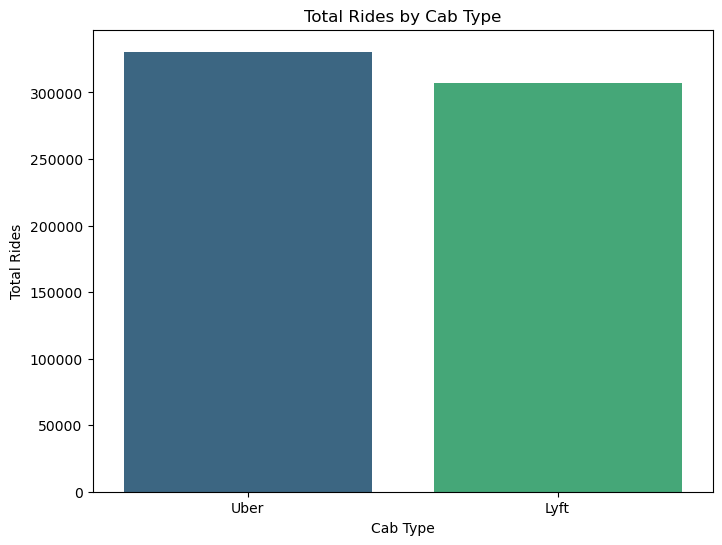

C:\Users\prati\AppData\Local\Temp\ipykernel_39432\4240375432.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cab_type', y='price', data=rideshare_data, ci=None, estimator='mean')


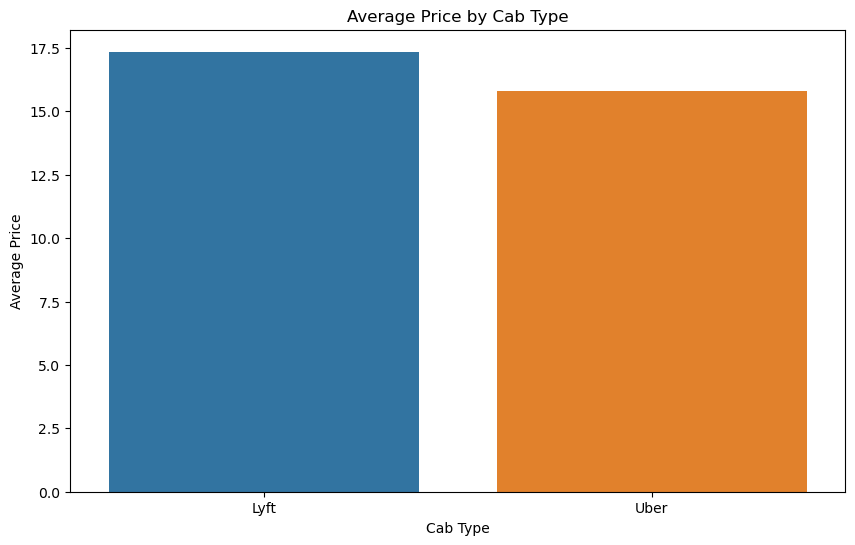

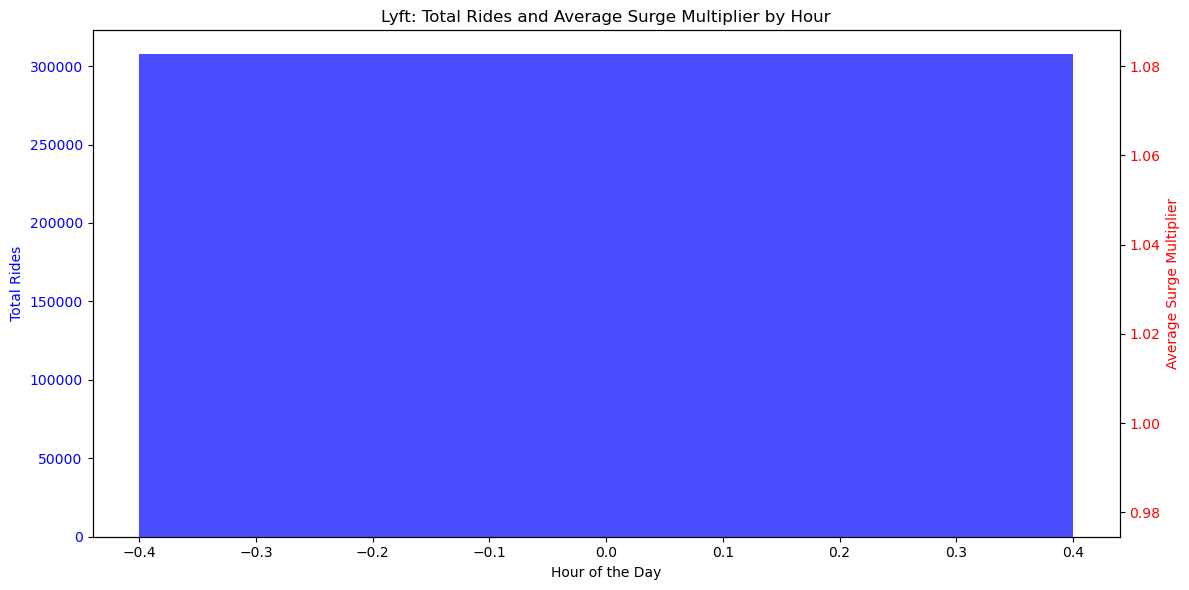

pickup_location column is not available in the dataset.


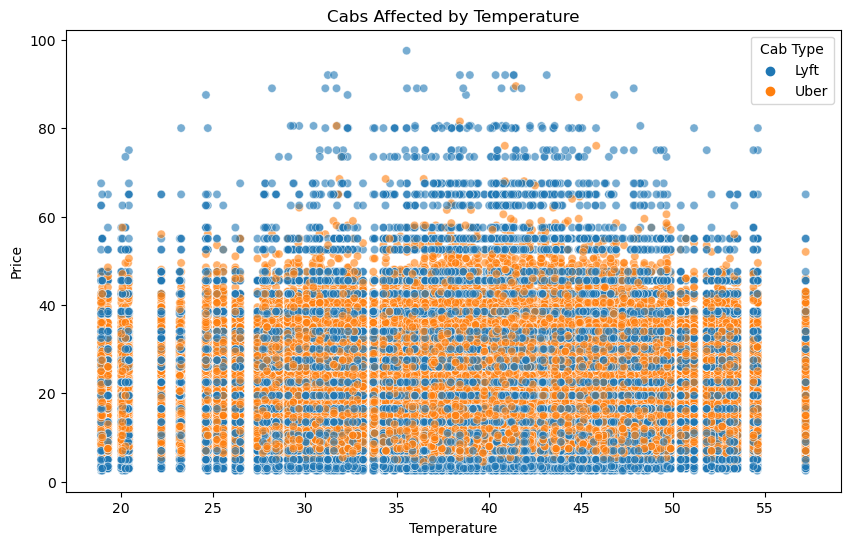

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update file path)
file_path = 'archive/rideshare_data_cleaned.csv'  # Adjust the path if needed
rideshare_data = pd.read_csv(file_path)

# Visualization 1: Count of Rides by Cab Type
plt.figure(figsize=(8, 6))
ride_counts = rideshare_data['cab_type'].value_counts()
sns.barplot(x=ride_counts.index, y=ride_counts.values, palette='viridis')
plt.title("Total Rides by Cab Type")
plt.xlabel("Cab Type")
plt.ylabel("Total Rides")
plt.show()

# Visualization 2: Price by Cab Type
plt.figure(figsize=(10, 6))
sns.barplot(x='cab_type', y='price', data=rideshare_data, ci=None, estimator='mean')
plt.title("Average Price by Cab Type")
plt.xlabel("Cab Type")
plt.ylabel("Average Price")
plt.show()

# Visualization 3: Lyft - Per Surge Multiplier vs. Total Rides by Hour of the Day
rideshare_data['hour'] = rideshare_data['hour'].astype(int)
lyft_data = rideshare_data[rideshare_data['cab_type'] == 'Lyft']
hourly_stats = lyft_data.groupby('hour').agg({
    'price': 'count',  # Total rides
    'surge_multiplier': 'mean'  # Average surge multiplier
}).reset_index()
hourly_stats.rename(columns={'price': 'Total Rides'}, inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Total Rides
ax1.bar(hourly_stats['hour'], hourly_stats['Total Rides'], alpha=0.7, color='blue', label='Total Rides')
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("Total Rides", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Surge Multiplier
ax2 = ax1.twinx()
ax2.plot(hourly_stats['hour'], hourly_stats['surge_multiplier'], color='red', label='Avg Surge Multiplier', linewidth=2)
ax2.set_ylabel("Average Surge Multiplier", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Lyft: Total Rides and Average Surge Multiplier by Hour")
fig.tight_layout()
plt.show()

# Visualization 4: Top 10 Popular Stations
if 'pickup_location' in rideshare_data.columns:
    popular_stations = rideshare_data['pickup_location'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=popular_stations.values, y=popular_stations.index, orient='h', palette='viridis')
    plt.title("Top 10 Popular Pickup Stations")
    plt.xlabel("Total Rides")
    plt.ylabel("Pickup Station")
    plt.show()
else:
    print("pickup_location column is not available in the dataset.")

# Visualization 5: Cabs Affected by Temperature
if 'temperature' in rideshare_data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature', y='price', hue='cab_type', data=rideshare_data, alpha=0.6)
    plt.title("Cabs Affected by Temperature")
    plt.xlabel("Temperature")
    plt.ylabel("Price")
    plt.legend(title="Cab Type")
    plt.show()
else:
    print("temperature column is not available in the dataset.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load and preprocess data
print("Loading data...")
data = pd.read_csv('archive/rideshare_data_cleaned.csv')
features = ['price', 'distance', 'hour', 'surge_multiplier']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-means Clustering
print("Running K-means...")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# 2. Gaussian Mixture Model
print("Running Gaussian Mixture Model...")
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# 3. PCA
print("Running PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Save results
data['kmeans_cluster'] = kmeans_clusters
data['gmm_cluster'] = gmm_clusters
data['pca_1'] = X_pca[:, 0]
data['pca_2'] = X_pca[:, 1]

# Calculate cluster statistics
def get_cluster_stats(data, cluster_column):
    stats = data.groupby(cluster_column)[features].agg([
        'mean', 'std', 'min', 'max'
    ]).round(2)
    return stats

# Get statistics for each technique
kmeans_stats = get_cluster_stats(data, 'kmeans_cluster')
gmm_stats = get_cluster_stats(data, 'gmm_cluster')

# Print results
print("\n=== Analysis Results ===")

print("\nK-means cluster sizes:")
print(pd.Series(kmeans_clusters).value_counts().to_dict())

print("\nGMM cluster sizes:")
print(pd.Series(gmm_clusters).value_counts().to_dict())

print("\nPCA explained variance ratio:")
print(pca.explained_variance_ratio_)

# Save detailed statistics to CSV
kmeans_stats.to_csv('kmeans_cluster_stats.csv')
gmm_stats.to_csv('gmm_cluster_stats.csv')

# Create basic plots
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Price (scaled)')
plt.ylabel('Distance (scaled)')
plt.savefig('kmeans_plot.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Price (scaled)')
plt.ylabel('Distance (scaled)')
plt.savefig('gmm_plot.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('pca_plot.png')
plt.close()

# Save all results to a new CSV
data.to_csv('rideshare_data_with_all_analysis.csv', index=False)

print("\nAll analysis completed! Check the saved CSV files and plots.")
print("1. rideshare_data_with_all_analysis.csv - Contains all original data with cluster assignments")
print("2. kmeans_cluster_stats.csv - Detailed statistics for K-means clusters")
print("3. gmm_cluster_stats.csv - Detailed statistics for GMM clusters")
print("4. Three visualization plots saved: kmeans_plot.png, gmm_plot.png, pca_plot.png")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Load data
data = pd.read_csv('rideshare_data_with_all_analysis.csv')

# Convert continuous target into categories (bins)
bin_edges = [0, 1, 2, 3, 4]
bin_labels = [0, 1, 2, 3]
data['surge_category'] = pd.cut(data['surge_multiplier'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Define target variable and a reduced set of features
target = 'surge_category'
features = ['price', 'distance', 'hour']  # Reduced feature set for simplicity
X = data[features]
y = data[target]

# Drop missing values
y = y.dropna()
X = X.loc[y.index]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train simpler models
models = {
    "Simple Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "Simple Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced'),
    "Simple Random Forest": RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5, class_weight='balanced')
}

results = {}
for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# Display results
print("\n=== Model Performance ===")
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Classification Report:\n{pd.DataFrame(result['Classification Report']).transpose()}")
